# Tutorial 04

In [1]:
using Random;
using LinearAlgebra;
using Plots;

### Question 1

Solution error and condition number of a single matrix.

1. Generate a random square matrix with size 4 (using the seed 10) with i.i.d entries from a uniform distribution over [-1; 1].

In [2]:
Random.seed!(10);

# A = rand(Uniform(-1, 1), 4, 4);
A = 2 * rand(4, 4) .- 1;
# println("Random square matrix A: ", A);

4×4 Matrix{Float64}:
  0.753807  -0.76574    0.727413  -0.251291
  0.435749  -0.572588   0.441537   0.87683
  0.354217   0.329614   0.546897   0.682201
 -0.454469  -0.619234  -0.659059  -0.704763

2. Solve the linear system Ax=b, where A is the matrix generated above and b is a randomly generated array (with the appropriate size) from the same distribution as A. Solve this system using both the type Float64 and BigFloat.

In [3]:
# b = rand(Uniform(-1, 1), 4);
b = 2 * rand(4) .- 1;

# println("Random array b: ", b);

x_float64 = A \ b;

# println("Float64 x: ", x_float64);

A_bigFloat = BigFloat.(A);
b_bigFloat = BigFloat.(b);

x_bigFloat = A_bigFloat \ b_bigFloat;

# println("BigFloat x: ", x_bigFloat);

4-element Vector{BigFloat}:
 -6.197733095230247471339247223606910097129293701737896881754543407786094014713997
 -0.7646561536240535760022408069047154378857640017780510406217124876387489624759838
  5.893608414095739711761542291114865899534244707068692414474961872143594031796185
  0.02455021791783233011201788990631293917839803537969298617557586693196068725522379

3. Compute the condition number of the matrix A using the function `LinearAlgebra.cond(A)`

In [4]:
condNum = cond(A);

# println("Conditional number of A: ", condNum);

66.10042261983003

4. Compute the approximation error as the norm (use `LinearAlgebra.norm(v)` of the difference between the solution of the system obtained with Float64 and BigFloat)

In [5]:
error = norm(x_float64 - x_bigFloat);

# println("The approximation error is: ", error);

4.871093265854803348836563188808078941489882126459633897301143670684938051081666e-15

5. Print out the matrix A, its condition number, and the approximation error of the solution.

In [6]:
println("Random square matrix A: ", A);
println("Conditional number of A: ", condNum);
println("The approximation error is: ", error);

Random square matrix A: [0.7538067356100449 -0.7657401765902323 0.7274126185775782 -0.2512908510495655; 0.4357488180167546 -0.5725876381356552 0.4415366724114804 0.8768298418604574; 0.35421708391968565 0.3296144000184451 0.5468969015365541 0.6822005470394041; -0.45446915344661654 -0.619234164349211 -0.6590591800340357 -0.7047633237164075]
Conditional number of A: 66.10042261983003
The approximation error is: 4.871093265854803348836563188808078941489882126459633897301143670684938051081666e-15


### Question 2

Reset the seed and repeat the steps 1-4 for 200 randomely generated matrices of size 10. Draw a scatterplot in logarithmic scale (for both axis) using on the x-axis the condition number and on the y-axis the solution error. Is there a trend in the data?

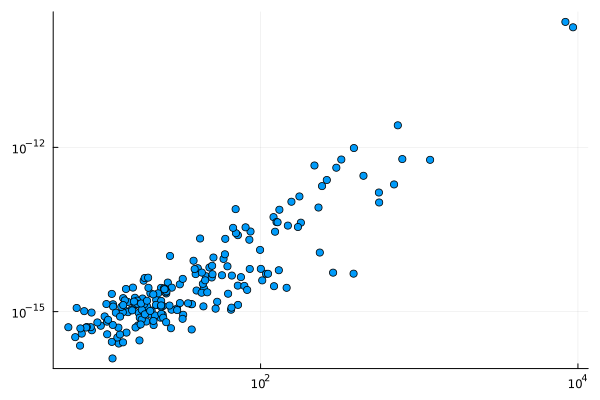

In [8]:
condNums = [];
errors = [];

Random.seed!(10);

for i in 1:200
    A = 2 * rand(10, 10) .- 1
    b = 2 * rand(10) .- 1

    x_float64 = A \ b;

    A_bigFloat = BigFloat.(A);
    b_bigFloat = BigFloat.(b);
    x_bigFloat = A_bigFloat \ b_bigFloat;

    local condNum = cond(A);
    push!(condNums, condNum);

    local error = norm(x_float64 - x_bigFloat);
    push!(errors, error);
end

replace!(condNums, 0.0 => NaN);
replace!(errors, 0.0 => NaN);

s = scatter(
    condNums,
    errors,
    xscale=:log10, 
    yscale=:log10,
    label=false
);

display(s)
